In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [25]:
from sklearn.datasets import load_boston

In [24]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [26]:
df_x = pd.DataFrame(boston.data,columns=boston.feature_names)
df_y =pd.DataFrame(boston.target)

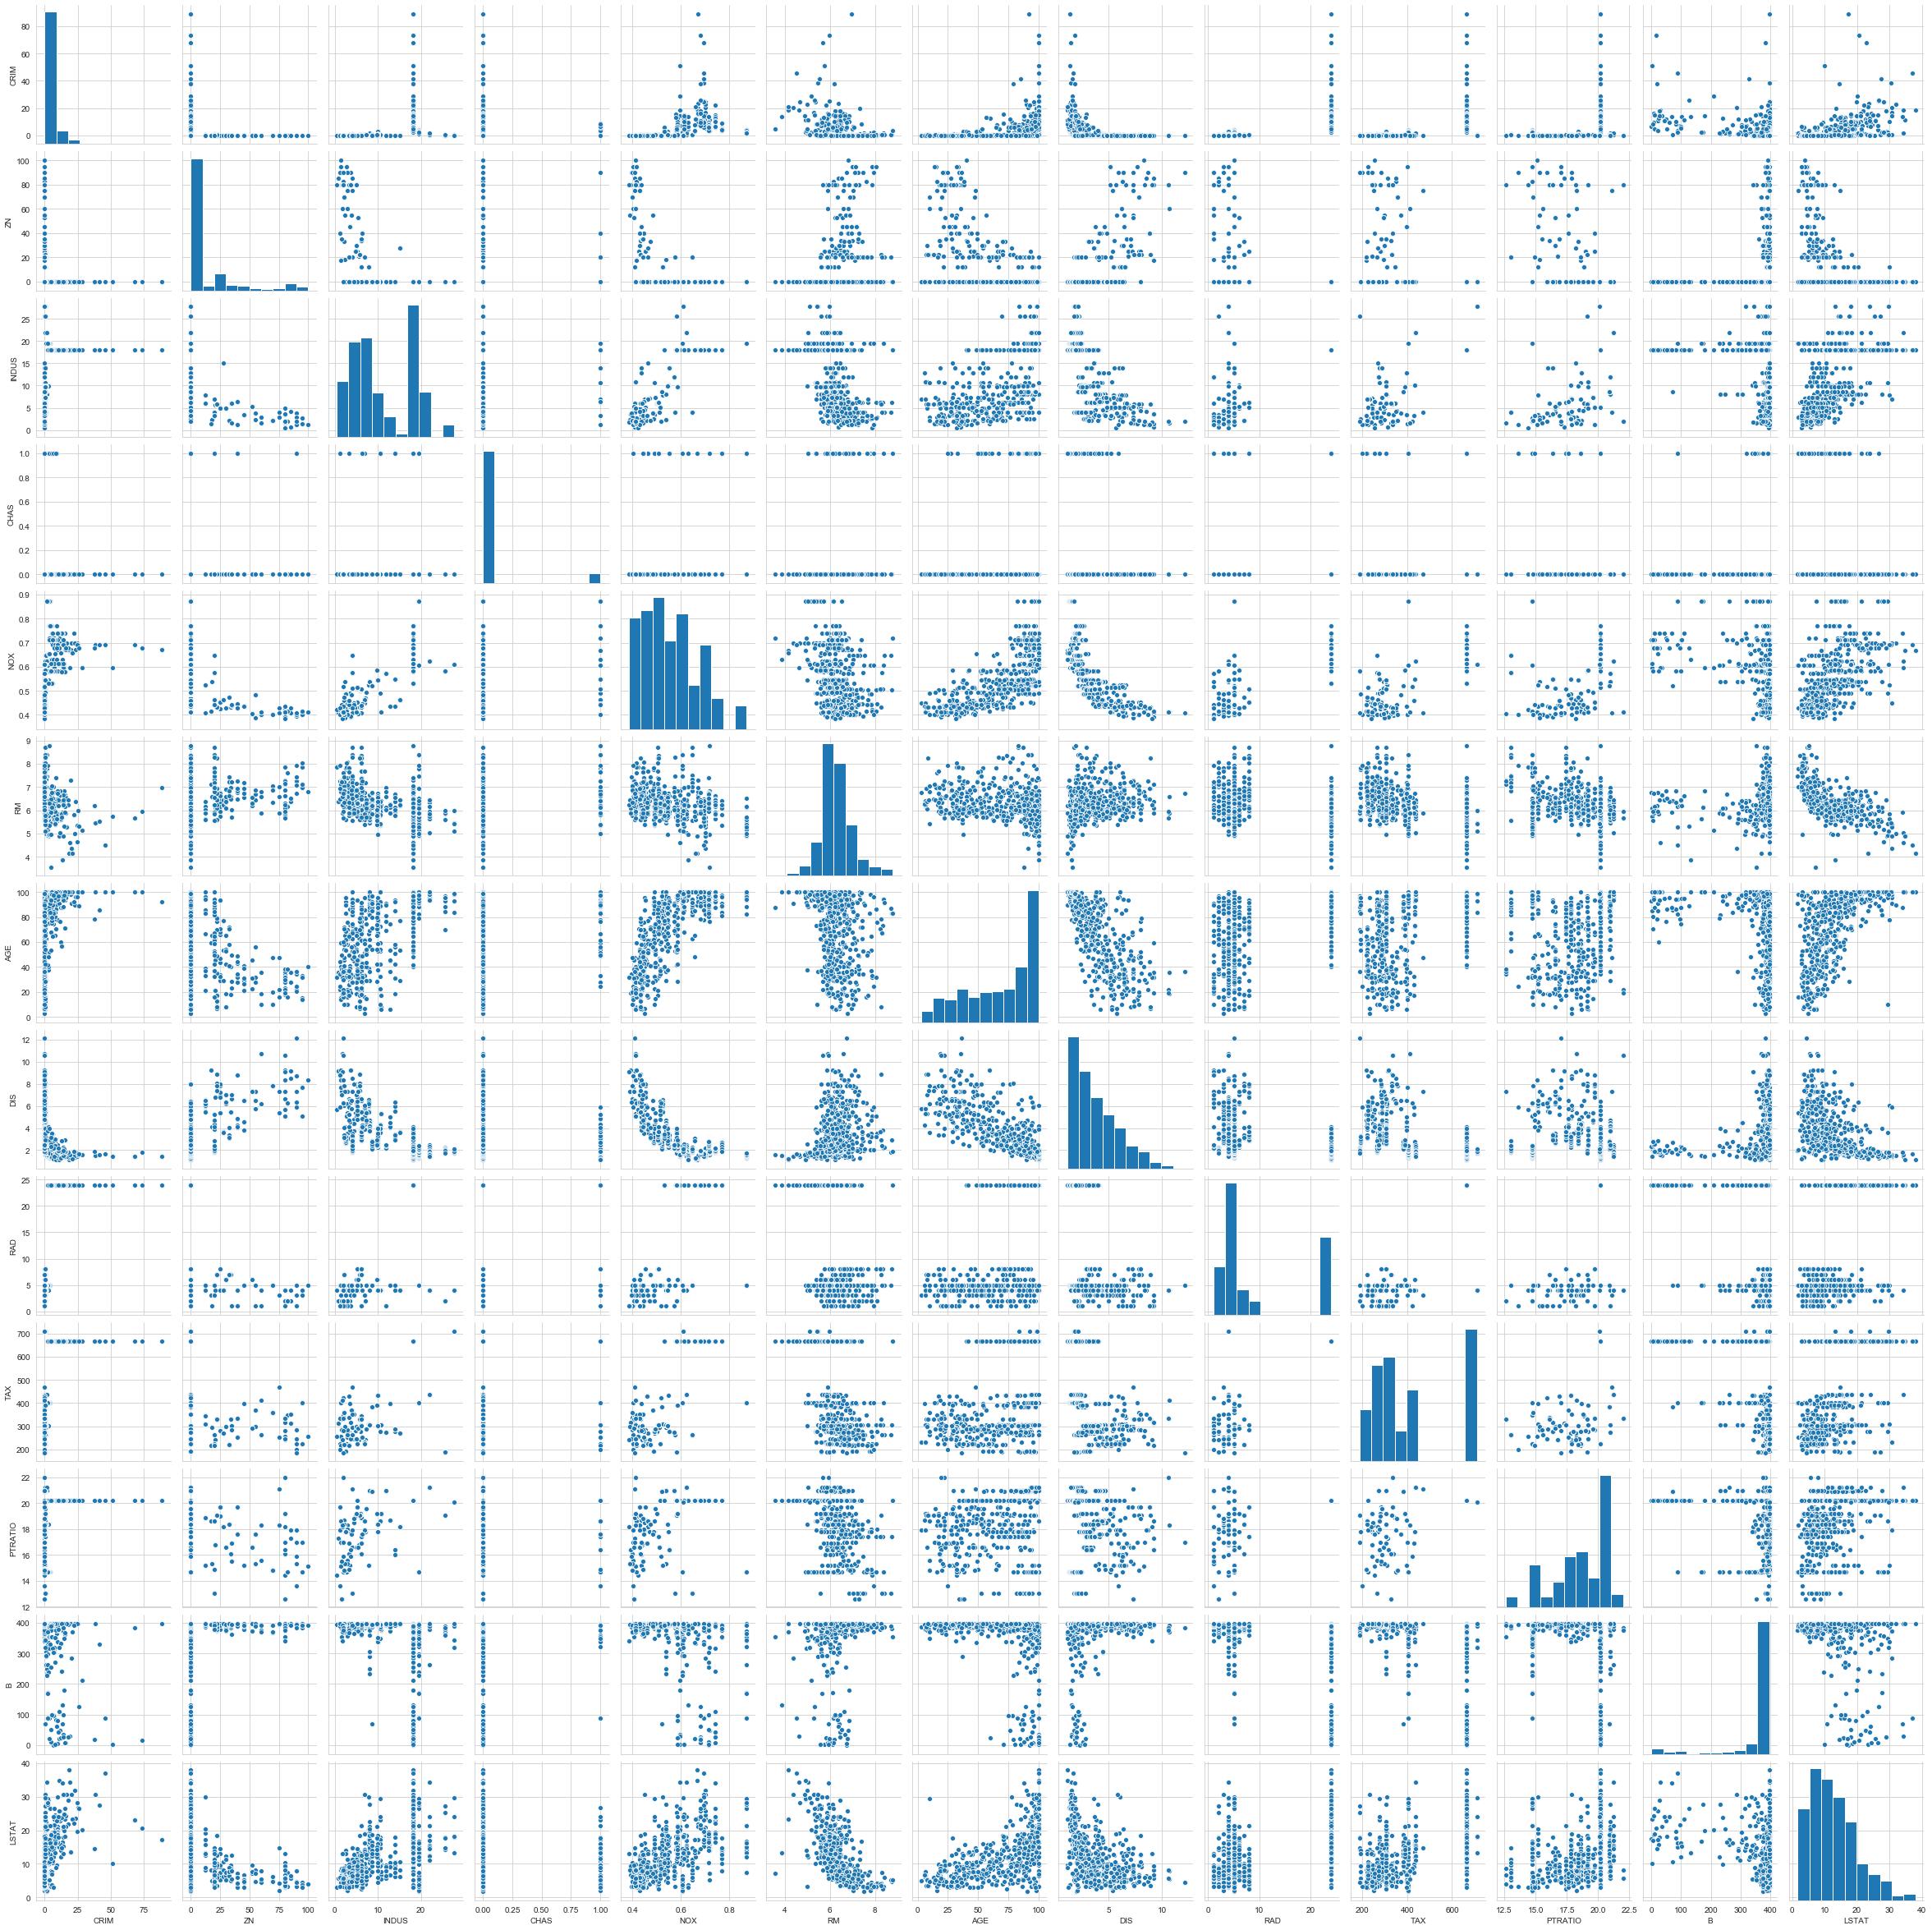

In [27]:
sns.set_style('whitegrid')
sns.pairplot(df_x)

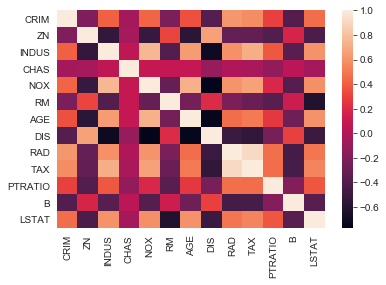

In [28]:
sns.heatmap(df_x.corr())

In [33]:
from sklearn.model_selection import train_test_split


In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(df_x,df_y,test_size = 0.33,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print(lm.intercept_)

[33.33497576]


In [48]:
a = lm.coef_
b = a.ravel()
coeff_df = pd.DataFrame(b,boston.feature_names,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.128750
ZN,0.037823
INDUS,0.058211
CHAS,3.238668
NOX,-16.169812
RM,3.902051
AGE,-0.012851
DIS,-1.422224
RAD,0.234854
TAX,-0.008213


In [49]:
y_predictions = lm.predict(X_test)

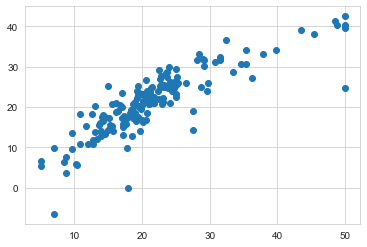

In [51]:
plt.scatter(Y_test,y_predictions)

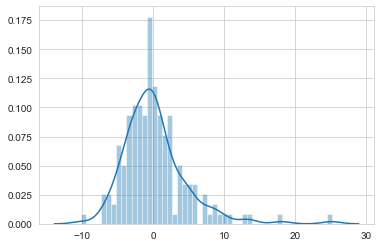

In [52]:
sns.distplot((Y_test-y_predictions),bins=50);

In [53]:
from sklearn import metrics

In [54]:
print('MAE',metrics.mean_absolute_error(Y_test,y_predictions))
print('MSE',metrics.mean_squared_error(Y_test,y_predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_predictions)))

MAE 3.148255754816827
MSE 20.724023437339696
RMSE 4.552364598463056
